In [1]:
import pandas as pd
df = pd.read_csv(r'D:\Data Analytics\Feynn Labs Internship\Task-2\mcdonalds.csv')

In [2]:
df.columns

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')

In [3]:
df.shape

(1453, 15)

In [4]:
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [8]:
MD_x = df.iloc[ : , 0:11]
MD_x = (MD_x == "Yes").astype(int)
print(MD_x.mean().round(2))

yummy         0.55
convenient    0.91
spicy         0.09
fattening     0.87
greasy        0.53
fast          0.90
cheap         0.60
tasty         0.64
expensive     0.36
healthy       0.20
disgusting    0.24
dtype: float64


In [9]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(MD_x)

PCA()

In [10]:
pca.explained_variance_ratio_

array([0.29944723, 0.19279721, 0.13304535, 0.08309578, 0.05948052,
       0.05029956, 0.0438491 , 0.03954779, 0.0367609 , 0.03235329,
       0.02932326])

In [12]:
import numpy as np
cumulative_var = np.cumsum(pca.explained_variance_ratio_)
print(np.round(cumulative_var,3))

[0.299 0.492 0.625 0.708 0.768 0.818 0.862 0.902 0.938 0.971 1.   ]


In [14]:
print("PCA mean (center):", np.round(pca.mean_, 1))

PCA mean (center): [0.6 0.9 0.1 0.9 0.5 0.9 0.6 0.6 0.4 0.2 0.2]


In [15]:
std_devs = np.sqrt(pca.explained_variance_)
print("Standard deviations (1, .., p=11):")
print(np.round(std_devs, 1))

Standard deviations (1, .., p=11):
[0.8 0.6 0.5 0.4 0.3 0.3 0.3 0.3 0.3 0.2 0.2]


In [16]:
print(f"Rotation (n x k) = ({pca.components_.shape[1]} x {pca.components_.shape[0]}):")
print(np.round(pca.components_.T, 1))

Rotation (n x k) = (11 x 11):
[[ 0.5 -0.4  0.3  0.1  0.3 -0.2 -0.3 -0.  -0.6  0.1 -0. ]
 [ 0.2 -0.   0.1 -0.1 -0.3  0.3 -0.1  0.1  0.   0.7  0.5]
 [ 0.  -0.   0.   0.2 -0.1  0.4  0.7 -0.4 -0.4  0.1 -0.1]
 [-0.1  0.   0.3 -0.4  0.1  0.4 -0.4 -0.6  0.2  0.  -0.3]
 [-0.3  0.1  0.8  0.3 -0.4 -0.2  0.   0.1  0.  -0.  -0. ]
 [ 0.1  0.1  0.1 -0.1 -0.1  0.6 -0.1  0.6 -0.2 -0.2 -0.3]
 [ 0.3  0.6  0.1  0.1  0.1  0.1 -0.  -0.1 -0.1 -0.4  0.5]
 [ 0.5 -0.3  0.3 -0.   0.2  0.1  0.4  0.1  0.6 -0.1 -0. ]
 [-0.3 -0.6 -0.   0.1  0.   0.3 -0.1 -0.  -0.1 -0.5  0.5]
 [ 0.2 -0.1 -0.2  0.8 -0.3  0.2 -0.3 -0.2  0.2  0.  -0.2]
 [-0.4  0.1  0.1  0.4  0.7  0.2 -0.   0.2  0.1  0.3  0. ]]


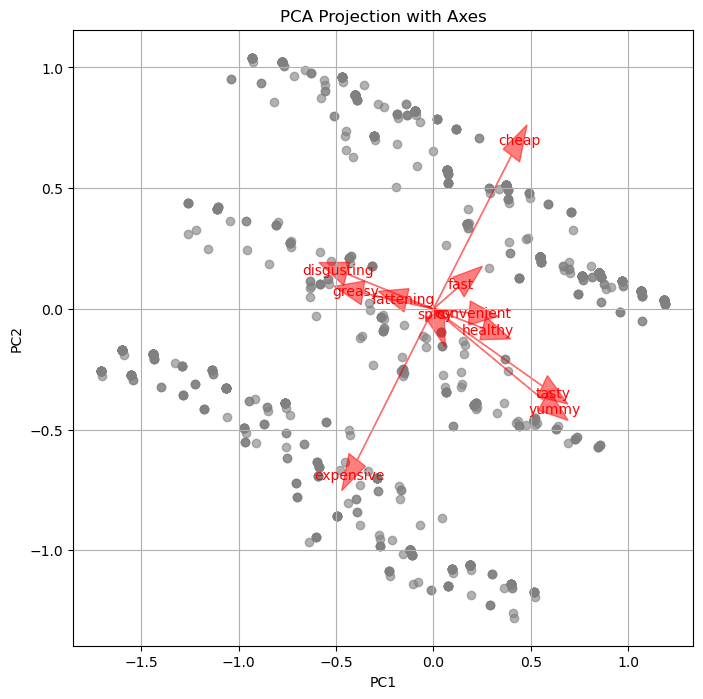

In [18]:
import matplotlib.pyplot as plt
scores = pca.fit_transform(MD_x)
plt.figure(figsize=(8, 8))
plt.scatter(scores[:, 0], scores[:, 1], color='grey', alpha=0.6)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Projection with Axes')
feature_names = MD_x.columns if hasattr(MD_x, 'columns') else [f"Var{i+1}" for i in range(MD_x.shape[1])]
for i, (x, y) in enumerate(pca.components_[:2].T):
    plt.arrow(0, 0, x * max(scores[:,0]), y * max(scores[:,1]), 
              color='red', alpha=0.5, head_width=0.1)
    plt.text(x * max(scores[:,0]) * 1.1, y * max(scores[:,1]) * 1.1, feature_names[i], 
             color='red', ha='center', va='center')

plt.grid()
plt.show()

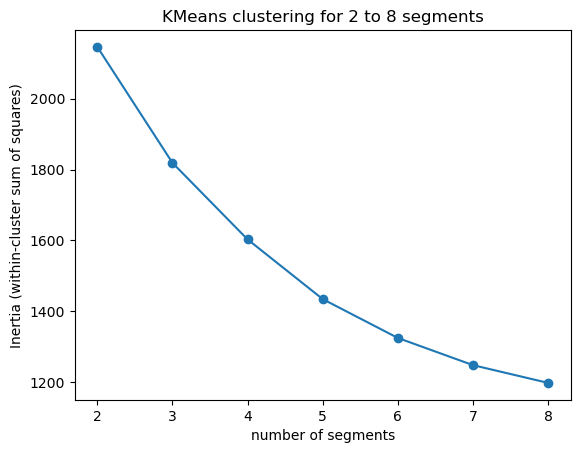

In [20]:
from sklearn.cluster import KMeans
np.random.seed(1234)
inertia = []
labels_dict = {}

for k in range(2, 9):
    best_inertia = np.inf
    best_labels = None
    # 10 repetitions for each k
    for rep in range(10):
        kmeans = KMeans(n_clusters=k, n_init=1, random_state=1234+rep)
        labels = kmeans.fit_predict(MD_x)
        if kmeans.inertia_ < best_inertia:
            best_inertia = kmeans.inertia_
            best_labels = labels
    inertia.append(best_inertia)
    labels_dict[k] = best_labels
plt.plot(range(2, 9), inertia, marker='o')
plt.xlabel("number of segments")
plt.ylabel("Inertia (within-cluster sum of squares)")
plt.title("KMeans clustering for 2 to 8 segments")
plt.show()

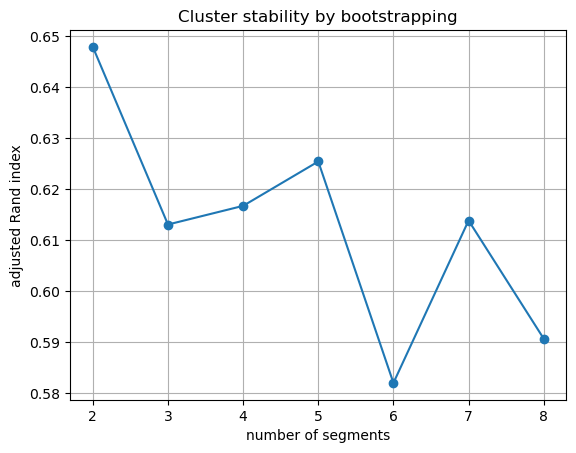

In [28]:
from sklearn.metrics import adjusted_rand_score
import numpy as np
n_boot = 100
n_samples = MD_x.shape[0]
ari_results = {k: [] for k in range(2, 9)}

np.random.seed(1234)
n_boot = 100
ari_scores = {k: [] for k in range(2, 9)}

for k in range(2, 9):
    base_labels = np.array(labels_dict[k])  # Ensure it's a NumPy array for positional indexing
    n_samples = len(MD_x)
    for b in range(n_boot):
        # Bootstrap sample indices
        idx = np.random.choice(n_samples, n_samples, replace=True)
        # Bootstrap sample
        if isinstance(MD_x, np.ndarray):
            X_boot = MD_x[idx]
        else:
            X_boot = MD_x.iloc[idx]
        kmeans = KMeans(n_clusters=k, n_init=1, random_state=1234+b)
        boot_labels = kmeans.fit_predict(X_boot)
        # Compare original labels for the sampled indices to the bootstrap labels
        score = adjusted_rand_score(base_labels[idx], boot_labels)
        ari_scores[k].append(score)

mean_ari = [np.mean(ari_scores[k]) for k in range(2, 9)]

plt.plot(range(2, 9), mean_ari, marker='o')
plt.xlabel("number of segments")
plt.ylabel("adjusted Rand index")
plt.title("Cluster stability by bootstrapping")
plt.grid(True)
plt.show()

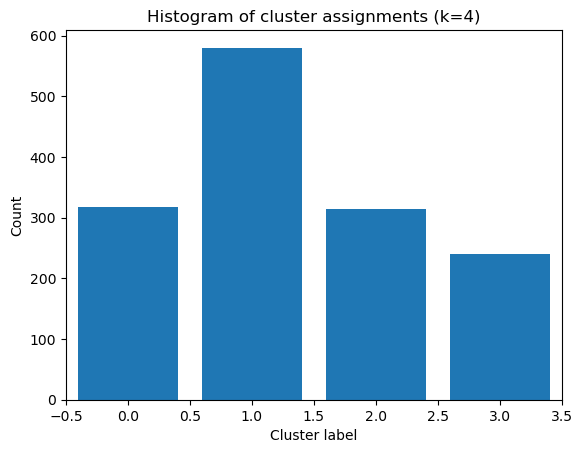

In [29]:
plt.hist(labels_dict[4], bins=np.arange(6)-0.5, rwidth=0.8)
plt.xlabel("Cluster label")
plt.ylabel("Count")
plt.title("Histogram of cluster assignments (k=4)")
plt.xlim(-0.5, 3.5)
plt.show()

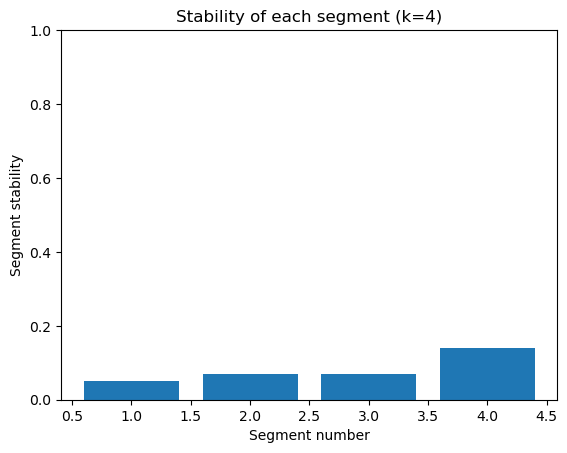

In [32]:
n_boot = 100
segment_stability = []
base_labels = np.array(labels_dict[4])  # Ensure NumPy array

for seg in range(4):
    seg_ari = []
    for b in range(n_boot):
        idx = np.random.choice(len(MD_x), len(MD_x), replace=True)
        
        # Use positional indexing for both DataFrame and NumPy array
        if isinstance(MD_x, np.ndarray):
            X_boot = MD_x[idx]
        else:
            X_boot = MD_x.iloc[idx]
        
        kmeans = KMeans(n_clusters=4, n_init=1, random_state=1234+b)
        boot_labels = kmeans.fit_predict(X_boot)
        
        # Get the original labels for the bootstrap sample
        base_labels_boot = base_labels[idx]
        
        # Mask for points in this segment in the bootstrap sample
        seg_mask = (base_labels_boot == seg)
        if np.sum(seg_mask) > 0:
            seg_ari.append(adjusted_rand_score(base_labels_boot[seg_mask], boot_labels[seg_mask]))
    # Average ARI for this segment across bootstraps
    segment_stability.append(np.mean(seg_ari) if seg_ari else 0)

plt.bar(range(1, 5), segment_stability)
plt.ylim(0, 1)
plt.xlabel("Segment number")
plt.ylabel("Segment stability")
plt.title("Stability of each segment (k=4)")
plt.show()

In [34]:
!pip install pomegranate

Defaulting to user installation because normal site-packages is not writeable

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.



  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
   ---------------------------------------- 0.0/212.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/212.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/212.5 MB ? eta -:--:--
   ---------------------------------------- 0.3/212.5 MB ? eta -:--:--
   ---------------------------------------- 0.5/212.5 MB 1.4 MB/s eta 0:02:32
   ---------------------------------------- 1.0/212.5 MB 1.6 MB/s eta 0:02:15
   ---------------------------------------- 1.3/212.5 MB 1.6 MB/s eta 0:02:13
   ---------------------------------------- 1.6/212.5 MB 1.6 MB/s eta 0:02:16
   ---------------------------------------- 2.1/212.5 MB 1.7 MB/s eta 0:02:06
   ---------------------------------------- 2.6/212.5 MB 1.8 MB/s eta 0:02:00
    --------------------------------------- 3.1/212.5 MB 1.8 MB/s eta 0:01:54
    --------------------------------------- 3.7/212.5 MB 2.0 MB/s e

k=2, best log-likelihood=11147.82
k=3, best log-likelihood=16097.18
k=4, best log-likelihood=19579.02
k=5, best log-likelihood=23355.04
k=6, best log-likelihood=24012.26
k=7, best log-likelihood=33229.56
k=8, best log-likelihood=25721.21


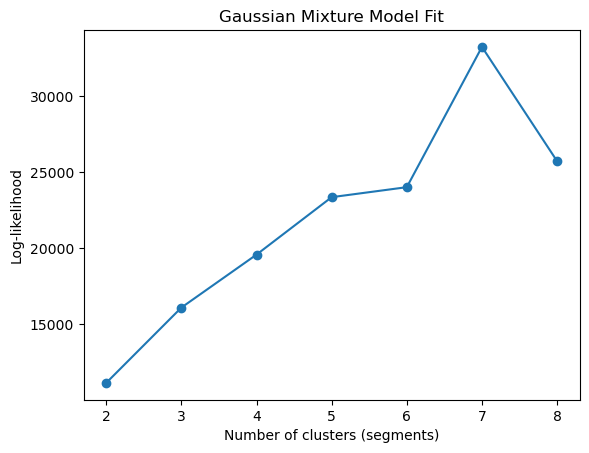

Cluster assignments for k=4: [0 3 2 ... 0 0 2]
Cluster means (for each feature in each cluster):
[[0.72580676 0.96671831 0.08432242 0.54511592 0.         0.87351789
  0.3705683  0.79213179 0.49090302 0.39151383 0.        ]
 [0.57936508 1.         0.07619048 1.         0.52857143 1.
  1.         0.6984127  0.         0.16190476 0.16825397]
 [0.         0.6157618  0.10206035 0.89808555 0.81644957 0.74144969
  0.2277721  0.19723091 0.69397685 0.07484142 0.68717839]
 [1.         0.94923858 0.15228426 0.93908629 0.97461929 0.86294416
  0.25380711 0.88832487 0.77664975 0.17766497 0.2284264 ]]


In [36]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture

# Assume MD_x is your data (NumPy array or DataFrame)
# If it's a DataFrame, convert to NumPy array:
# MD_x = MD_x.values

best_models = {}
log_likelihoods = []

for k in range(2, 9):  # k = 2:8
    best_model = None
    best_logp = -np.inf
    for rep in range(10):  # nrep = 10
        model = GaussianMixture(n_components=k, n_init=1, random_state=1234+rep)
        model.fit(MD_x)
        logp = model.score(MD_x) * MD_x.shape[0]  # score() returns average log likelihood
        if logp > best_logp:
            best_logp = logp
            best_model = model
    best_models[k] = best_model
    log_likelihoods.append(best_logp)
    print(f"k={k}, best log-likelihood={best_logp:.2f}")

# Optional: Plot log-likelihood vs. number of clusters
plt.plot(range(2, 9), log_likelihoods, marker='o')
plt.xlabel("Number of clusters (segments)")
plt.ylabel("Log-likelihood")
plt.title("Gaussian Mixture Model Fit")
plt.show()

# Example: Get cluster assignments for k=4
labels = best_models[4].predict(MD_x)
print("Cluster assignments for k=4:", labels)

# Example: Get means for each cluster for k=4
print("Cluster means (for each feature in each cluster):")
print(best_models[4].means_)

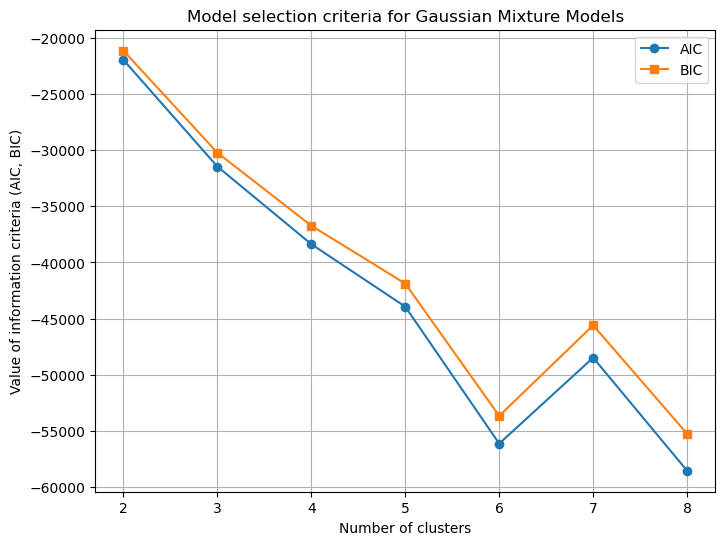

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture

# Assume MD_x is your data (NumPy array or DataFrame)
# If DataFrame, convert: MD_x = MD_x.values

aic_values = []
bic_values = []
ks = range(2, 9)

for k in ks:
    model = GaussianMixture(n_components=k, n_init=10, random_state=1234)
    model.fit(MD_x)
    aic_values.append(model.aic(MD_x))
    bic_values.append(model.bic(MD_x))
    # ICL is not provided by scikit-learn; typically, ICL ≈ BIC for many practical purposes

plt.figure(figsize=(8, 6))
plt.plot(ks, aic_values, marker='o', label='AIC')
plt.plot(ks, bic_values, marker='s', label='BIC')
plt.xlabel("Number of clusters")
plt.ylabel("Value of information criteria (AIC, BIC)")
plt.title("Model selection criteria for Gaussian Mixture Models")
plt.legend()
plt.grid(True)
plt.show()

Contingency table between KMeans and GMM clusters:
mixture    0    1    2    3
kmeans                     
0         29   50  268   17
1         28  188    0   24
2        152    0  362   19
3        123    0    0  193


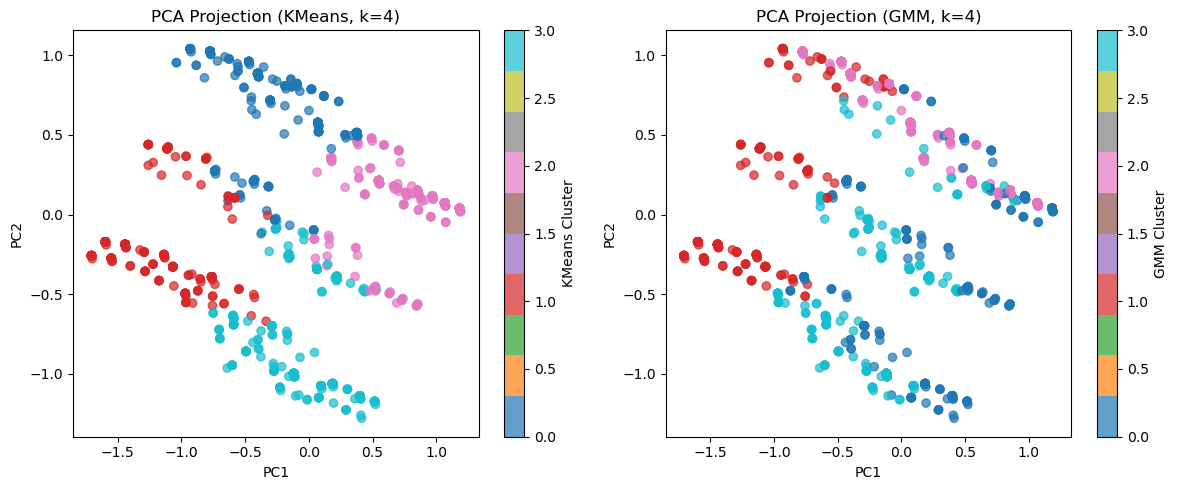

In [40]:
kmeans_model = KMeans(n_clusters=4, n_init=10, random_state=1234)
kmeans_labels = kmeans_model.fit_predict(MD_x)

gmm_model = GaussianMixture(n_components=4, n_init=10, random_state=1234)
mixture_labels = gmm_model.fit_predict(MD_x)

# --- 3. Contingency Table (Cross-tabulation) ---
contingency = pd.crosstab(
    pd.Series(kmeans_labels, name='kmeans'),
    pd.Series(mixture_labels, name='mixture')
)
print("Contingency table between KMeans and GMM clusters:")
print(contingency)

# --- 4. (Optional) Plot PCA projection colored by cluster assignments ---
pca = PCA(n_components=2)
X_pca = pca.fit_transform(MD_x)

fig, axs = plt.subplots(1, 2, figsize=(12, 5))

scatter1 = axs[0].scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels, cmap='tab10', alpha=0.7)
axs[0].set_title('PCA Projection (KMeans, k=4)')
axs[0].set_xlabel('PC1')
axs[0].set_ylabel('PC2')
plt.colorbar(scatter1, ax=axs[0], label='KMeans Cluster')

scatter2 = axs[1].scatter(X_pca[:, 0], X_pca[:, 1], c=mixture_labels, cmap='tab10', alpha=0.7)
axs[1].set_title('PCA Projection (GMM, k=4)')
axs[1].set_xlabel('PC1')
axs[1].set_ylabel('PC2')
plt.colorbar(scatter2, ax=axs[1], label='GMM Cluster')

plt.tight_layout()
plt.show()

In [41]:
from sklearn.cluster import KMeans
kmeans_model = KMeans(n_clusters=4, n_init=10, random_state=1234)
kmeans_labels = kmeans_model.fit_predict(MD_x)

from sklearn.mixture import GaussianMixture
import numpy as np
# Compute the mean of each KMeans cluster
means_init = np.array([MD_x[kmeans_labels == i].mean(axis=0) for i in range(4)])
gmm_model = GaussianMixture(n_components=4, n_init=1, means_init=means_init, random_state=1234)
gmm_labels = gmm_model.fit_predict(MD_x)

import pandas as pd

contingency = pd.crosstab(
    pd.Series(kmeans_labels, name='kmeans'),
    pd.Series(gmm_labels, name='mixture')
)
print(contingency)

mixture    0    1    2    3
kmeans                     
0        309   48    7    0
1         12  223    1    4
2         17    1  505   10
3          1   39   24  252


In [42]:
# Assume gmm_model is your fitted GaussianMixture instance
log_likelihood = gmm_model.score(MD_x) * MD_x.shape[0]  # total log-likelihood
n_parameters = gmm_model._n_parameters()
print(f"logLik.: {log_likelihood:.3f} (df={n_parameters})")

logLik.: 14233.895 (df=311)


In [45]:
import pandas as pd

# 1. Extract the numeric part (including negative numbers) from the 'Like' column
df['Like_num'] = df['Like'].str.extract(r'(-?\d+)').astype(float)

# 2. Recode as in R: Like_n = 6 - Like_num
df['Like_n'] = 6 - df['Like_num']

# 3. Frequency table of the new variable, sorted by value
like_n_counts = df['Like_n'].value_counts().sort_index()
print(like_n_counts)
print(df['Like'].value_counts().sort_index(ascending=False))

Like_n
1.0     143
2.0     160
3.0     229
4.0     187
5.0     152
6.0     169
7.0      58
8.0      59
9.0      73
10.0     71
11.0    152
Name: count, dtype: int64
Like
I love it!+5    143
I hate it!-5    152
0               169
-4               71
-3               73
-2               59
-1               58
+4              160
+3              229
+2              187
+1              152
Name: count, dtype: int64


In [47]:
# Assume your DataFrame is named df

# 1. Get the first 11 column names
predictors = df.columns[:11]

# 2. Build the formula string
formula = "Like_n ~ " + " + ".join(predictors)

print(formula)

Like_n ~ yummy + convenient + spicy + fattening + greasy + fast + cheap + tasty + expensive + healthy + disgusting


In [48]:
import statsmodels.formula.api as smf

# Fit a linear model
model = smf.ols(formula=formula, data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Like_n   R-squared:                       0.623
Model:                            OLS   Adj. R-squared:                  0.621
Method:                 Least Squares   F-statistic:                     216.9
Date:                Mon, 05 May 2025   Prob (F-statistic):          4.03e-296
Time:                        05:19:01   Log-Likelihood:                -3003.4
No. Observations:                1453   AIC:                             6031.
Df Residuals:                    1441   BIC:                             6094.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             7.9242      0.28

In [50]:
import numpy as np
import pandas as pd
from sklearn.mixture import GaussianMixture

# --- Step 1: Clean predictors (first 11 columns) ---
df_clean = df.copy()

for col in df_clean.columns[:11]:
    if df_clean[col].dtype == 'object':
        # Try mapping 'No'/'Yes' if present
        unique_vals = set(df_clean[col].dropna().unique())
        if unique_vals <= {'No', 'Yes'}:
            df_clean[col] = df_clean[col].map({'No': 0, 'Yes': 1})
        else:
            # Try to convert to numeric, non-convertible values become NaN
            df_clean[col] = pd.to_numeric(df_clean[col], errors='coerce')

# Drop rows with any NaN in the first 11 columns
df_clean = df_clean.dropna(subset=df_clean.columns[:11])

# --- Step 2: Prepare predictor matrix ---
X = df_clean[df_clean.columns[:11]].values

# --- Step 3: Fit GMM with 2 components and 10 initializations ---
np.random.seed(1234)
gmm = GaussianMixture(n_components=2, n_init=10, random_state=1234)
clusters = gmm.fit_predict(X)

# --- Step 4: Add cluster labels to the DataFrame ---
df_clean['Cluster'] = clusters

# --- Step 5: Print cluster sizes (like R's output) ---
cluster_sizes = pd.Series(clusters).value_counts().sort_index()
print("Cluster sizes:")
for i, size in enumerate(cluster_sizes, 1):
    print(f"{i} {size}")

print(f"Convergence after {gmm.n_iter_} iterations")

Cluster sizes:
1 985
2 468
Convergence after 7 iterations


In [51]:
df['Cluster'] = gmm.predict(X)  # X is your predictor matrix

# For each cluster, fit a regression and print the summary
for c in sorted(df['Cluster'].unique()):
    print(f"\nCluster {c} regression summary:")
    subdf = df[df['Cluster'] == c]
    model = smf.ols(formula=formula, data=subdf).fit()  # formula as built earlier
    print(model.summary())


Cluster 0 regression summary:
                            OLS Regression Results                            
Dep. Variable:                 Like_n   R-squared:                       0.405
Model:                            OLS   Adj. R-squared:                  0.400
Method:                 Least Squares   F-statistic:                     83.00
Date:                Mon, 05 May 2025   Prob (F-statistic):          1.34e-104
Time:                        05:22:36   Log-Likelihood:                -1982.1
No. Observations:                 985   AIC:                             3982.
Df Residuals:                     976   BIC:                             4026.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept

C:\Users\SRIKAR PILLALAMARRI\AppData\Local\Temp\ipykernel_29604\1961770801.py:35: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(predictors, rotation=45, ha='right')
C:\Users\SRIKAR PILLALAMARRI\AppData\Local\Temp\ipykernel_29604\1961770801.py:35: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(predictors, rotation=45, ha='right')


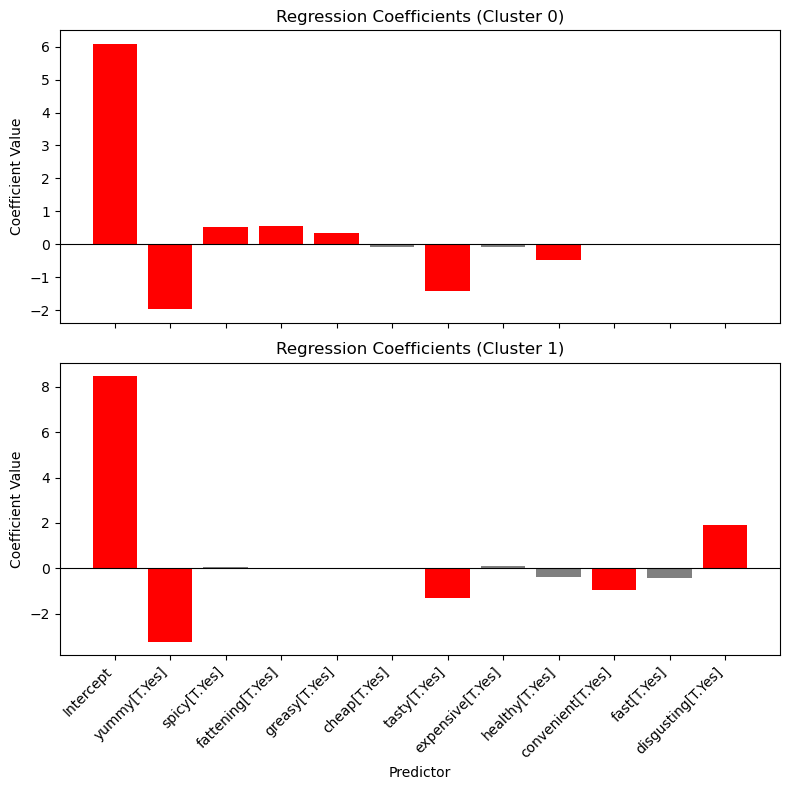

In [52]:
import matplotlib.pyplot as plt
import numpy as np

# Collect regression summaries for each cluster
coefs = []
pvals = []
cluster_labels = sorted(df['Cluster'].unique())
for c in cluster_labels:
    subdf = df[df['Cluster'] == c]
    model = smf.ols(formula=formula, data=subdf).fit()
    coefs.append(model.params)
    pvals.append(model.pvalues)

# Convert to DataFrames for easier plotting
coefs_df = pd.DataFrame(coefs, index=[f"Cluster {c}" for c in cluster_labels])
pvals_df = pd.DataFrame(pvals, index=[f"Cluster {c}" for c in cluster_labels])

# Plot
fig, axes = plt.subplots(len(cluster_labels), 1, figsize=(8, 4 * len(cluster_labels)), sharex=True)

if len(cluster_labels) == 1:
    axes = [axes]  # Ensure axes is iterable

for i, c in enumerate(cluster_labels):
    ax = axes[i]
    coef = coefs_df.loc[f"Cluster {c}"]
    pval = pvals_df.loc[f"Cluster {c}"]
    predictors = coef.index

    # Plot all coefficients
    ax.bar(predictors, coef, color=['red' if pv < 0.05 else 'gray' for pv in pval])
    ax.set_title(f"Regression Coefficients (Cluster {c})")
    ax.axhline(0, color='black', linewidth=0.8)
    ax.set_ylabel("Coefficient Value")
    ax.set_xticklabels(predictors, rotation=45, ha='right')

plt.xlabel("Predictor")
plt.tight_layout()
plt.show()

             fast  convenient  fattening     cheap     tasty     yummy  \
Cluster                                                                  
0        0.956044    0.906593   0.931319  0.901099  0.285714  0.019231   
1        0.741667    0.679167   0.916667  0.066667  0.079167  0.020833   
2        0.958724    0.981238   0.778612  0.923077  0.973734  0.966229   
3        0.857595    0.958861   0.905063  0.107595  0.930380  0.873418   

         disgusting  expensive    greasy   healthy     spicy  
Cluster                                                       
0          0.329670   0.013736  0.596154  0.074176  0.082418  
1          0.725000   0.895833  0.708333  0.062500  0.075000  
2          0.046904   0.018762  0.348968  0.339587  0.084428  
3          0.107595   0.917722  0.607595  0.208861  0.136076  


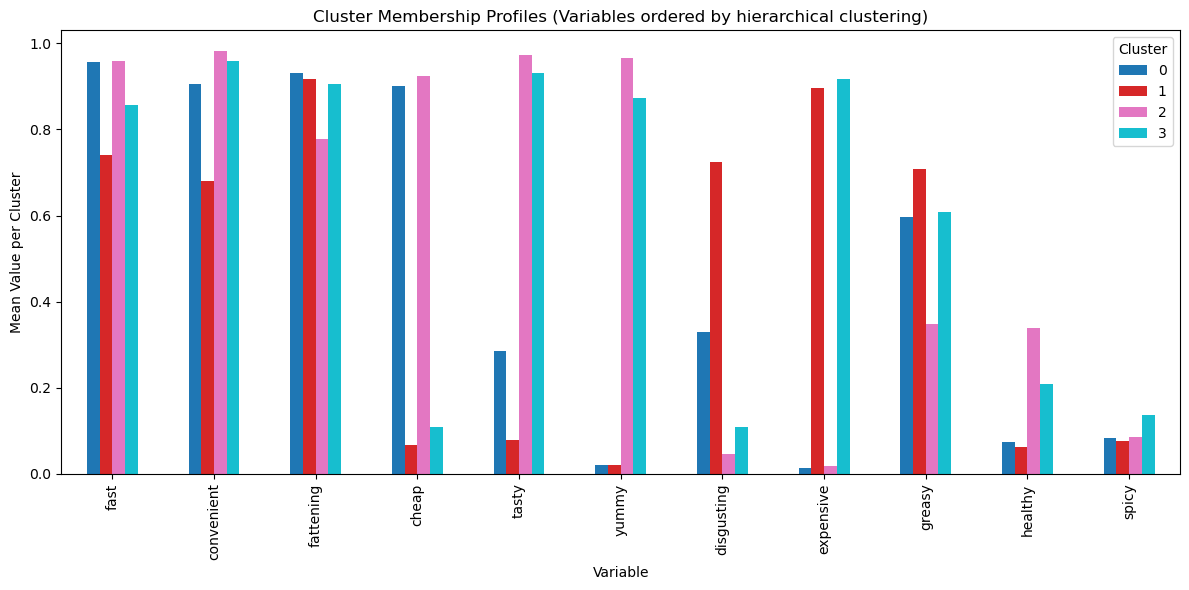

In [57]:
import numpy as np
import pandas as pd
from scipy.cluster.hierarchy import linkage, leaves_list
from scipy.spatial.distance import pdist
import matplotlib.pyplot as plt

# Your actual variable names
var_names = [
    'yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
    'tasty', 'expensive', 'healthy', 'disgusting'
]

# Assume MD_x is your DataFrame and kmeans_labels is your cluster assignment
df_bar = MD_x.copy()
df_bar['Cluster'] = kmeans_labels

# Hierarchical clustering on variables (columns)
dist_vars = pdist(df_bar[var_names].T, metric='euclidean')
linkage_vars = linkage(dist_vars, method='ward')
ordered_vars = leaves_list(linkage_vars)[::-1]
ordered_colnames = [var_names[i] for i in ordered_vars]

# Compute mean profile for each cluster
cluster_profiles = df_bar.groupby('Cluster')[ordered_colnames].mean()
print(cluster_profiles)  # Should now show real values

# Plot
ax = cluster_profiles.T.plot(kind='bar', figsize=(12, 6), colormap='tab10')
plt.title("Cluster Membership Profiles (Variables ordered by hierarchical clustering)")
plt.xlabel("Variable")
plt.ylabel("Mean Value per Cluster")
plt.legend(title="Cluster")
plt.tight_layout()
plt.show()

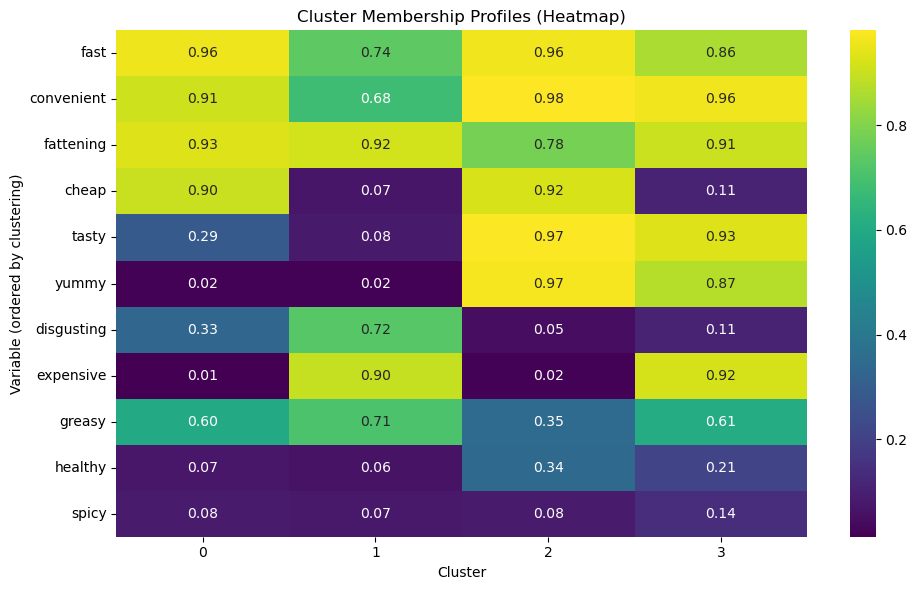

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

# Use your actual variable names
var_names = [
    'yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
    'tasty', 'expensive', 'healthy', 'disgusting'
]

# Ensure df_bar is your DataFrame with these columns and a 'Cluster' column
# Hierarchical clustering to order variables
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, leaves_list

dist_vars = pdist(df_bar[var_names].T, metric='euclidean')
linkage_vars = linkage(dist_vars, method='ward')
ordered_vars = leaves_list(linkage_vars)[::-1]
ordered_colnames = [var_names[i] for i in ordered_vars]

# Compute cluster profiles
cluster_profiles = df_bar.groupby('Cluster')[ordered_colnames].mean()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(cluster_profiles.T, cmap='viridis', annot=True, fmt=".2f")
plt.title("Cluster Membership Profiles (Heatmap)")
plt.xlabel("Cluster")
plt.ylabel("Variable (ordered by clustering)")
plt.tight_layout()
plt.show()

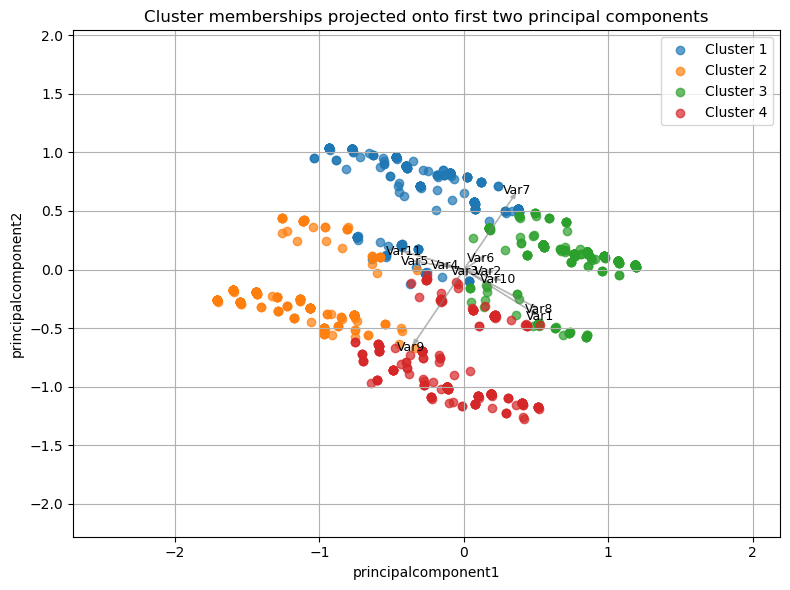

In [59]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Assume MD_x is your data (samples x features), and kmeans_labels are your cluster assignments
pca = PCA(n_components=2)
X_pca = pca.fit_transform(MD_x)
# Scatter plot, colored by cluster
plt.figure(figsize=(8, 6))
for cluster in np.unique(kmeans_labels):
    plt.scatter(
        X_pca[kmeans_labels == cluster, 0],
        X_pca[kmeans_labels == cluster, 1],
        label=f'Cluster {cluster+1}', alpha=0.7
    )

plt.xlabel("principalcomponent1")
plt.ylabel("principalcomponent2")
plt.legend()
plt.title("Cluster memberships projected onto first two principal components")
# Draw variable axes (loadings) as arrows
for i, (comp1, comp2) in enumerate(pca.components_.T):
    plt.arrow(0, 0, comp1, comp2, color='gray', alpha=0.5, head_width=0.03)
    plt.text(comp1*1.1, comp2*1.1, f"Var{i+1}", color='black', ha='center', va='center', fontsize=9)

# Optionally, set axis limits for better visibility
plt.xlim(X_pca[:,0].min()-1, X_pca[:,0].max()+1)
plt.ylim(X_pca[:,1].min()-1, X_pca[:,1].max()+1)
plt.grid(True)
plt.tight_layout()
plt.show()

<Figure size 800x600 with 0 Axes>

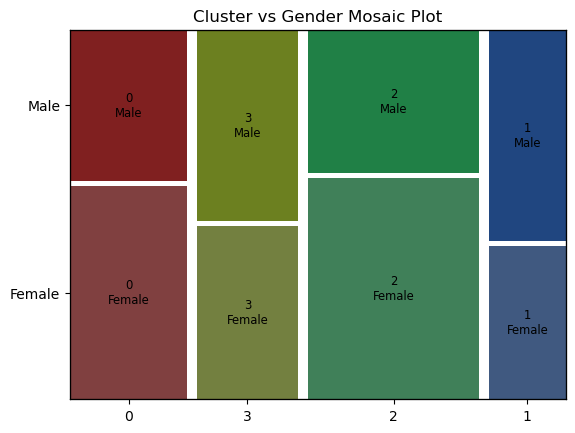

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.mosaicplot import mosaic

# Assume you have:
# - kmeans_labels (your cluster assignments, e.g. from KMeans or GMM)
# - df['Gender'] (your gender column)

# 1. Prepare a DataFrame for plotting
plot_df = pd.DataFrame({'Cluster': kmeans_labels, 'Gender': df['Gender']})

# 2. Create the mosaic plot
plt.figure(figsize=(8, 6))
mosaic(plot_df, ['Cluster', 'Gender'], title='Cluster vs Gender Mosaic Plot', gap=0.02)
plt.show()

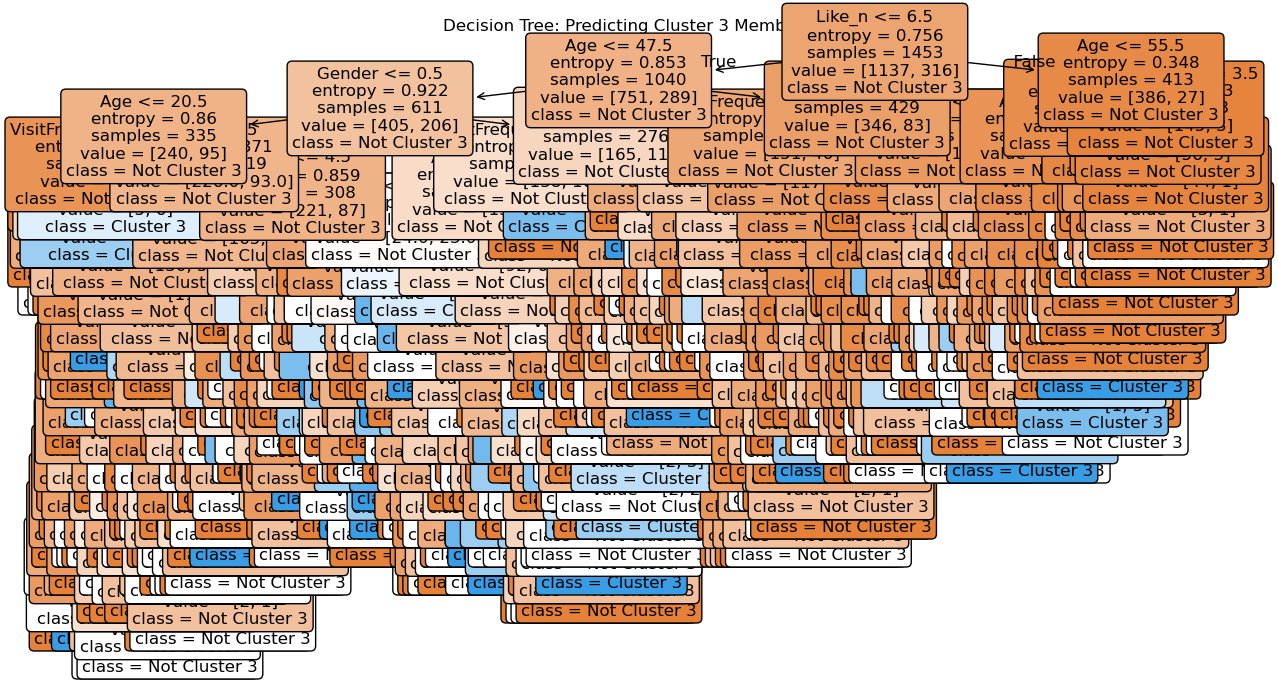

In [62]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# Assume df is your DataFrame and kmeans_labels is your cluster assignment (like k4 in R)
df = df.copy()  # To avoid SettingWithCopyWarning

# Target: 1 if cluster == 3, else 0
df['target'] = (kmeans_labels == 3).astype(int)

# Encode 'Gender' if it's categorical
if df['Gender'].dtype == 'object':
    df['Gender'] = LabelEncoder().fit_transform(df['Gender'])

# Encode 'VisitFrequency' if it's categorical
if df['VisitFrequency'].dtype == 'object':
    df['VisitFrequency'] = LabelEncoder().fit_transform(df['VisitFrequency'])

# Select features
features = ['Like_n', 'Age', 'VisitFrequency', 'Gender']

# Prepare X and y
X = df[features]
y = df['target']

# Fit decision tree
tree = DecisionTreeClassifier(criterion='entropy', random_state=0)
tree.fit(X, y)

# Plot tree
plt.figure(figsize=(14, 8))
plot_tree(tree, feature_names=features, class_names=['Not Cluster 3', 'Cluster 3'],
          filled=True, rounded=True, fontsize=12)
plt.title("Decision Tree: Predicting Cluster 3 Membership")
plt.show()

In [63]:
import pandas as pd

# If VisitFrequency is not numeric, encode it first (see note below)
# df['VisitFrequency'] = pd.to_numeric(df['VisitFrequency'], errors='coerce')

# Add cluster labels to DataFrame if not already present
df['Cluster'] = kmeans_labels

# Compute the mean VisitFrequency per cluster
visit = df.groupby('Cluster')['VisitFrequency'].mean()
print(visit)

Cluster
0    2.730769
1    2.691667
2    2.602251
3    2.550633
Name: VisitFrequency, dtype: float64


In [64]:
import pandas as pd

# Add cluster labels to DataFrame if not already present
df['Cluster'] = kmeans_labels

# Calculate the mean of Like_n for each cluster
like = df.groupby('Cluster')['Like_n'].mean()
print(like)

Cluster
0    7.175824
1    8.670833
2    3.165103
3    3.825949
Name: Like_n, dtype: float64
